In [2]:
import sqlite3
!pip install pandas
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/70/94/784178ca5dd892a98f113cdd923372024dc04b8d40abe77ca76b5fb90ca6/pytz-2021.1-py2.py3-none-any.whl


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Reading data

In [2]:
seasons = ["2016-17", "2017-18", "2018-19", "2019-20", "2020-21"]

def get_player_directories(player):
    player_first_name = player.split()[0]
    player_second_name = player.split()[1]
    player_directories = dict()
    for season in seasons:
        players_ids = pd.read_csv("data/{}/player_idlist.csv".format(season))
        player_id = kane_id = players_ids.loc[(players_ids['first_name'] == player_first_name) &
                                              (players_ids['second_name'] == player_second_name)]

        try:
            pid = player_id.id.values[0]
            if season in ["2016-17", "2017-18"]:
                player_directories[season] = "data/{}/players/{}_{}".format(season, player_first_name, player_second_name) 
            else:
                player_directories[season] = "data/{}/players/{}_{}_{}".format(season, player_first_name, player_second_name, pid)       
        except:
            print ('Cannot find')
    return player_directories
            

In [3]:
kane_directories = get_player_directories("Harry Kane")
salah_directories = get_player_directories("Mohamed Salah")
aguero_directories = get_player_directories("Sergio Agüero")

Cannot find


In [4]:
kane_directories

{'2016-17': 'data/2016-17/players/Harry_Kane',
 '2017-18': 'data/2017-18/players/Harry_Kane',
 '2018-19': 'data/2018-19/players/Harry_Kane_372',
 '2019-20': 'data/2019-20/players/Harry_Kane_338',
 '2020-21': 'data/2020-21/players/Harry_Kane_388'}

In [5]:
salah_directories

{'2017-18': 'data/2017-18/players/Mohamed_Salah',
 '2018-19': 'data/2018-19/players/Mohamed_Salah_253',
 '2019-20': 'data/2019-20/players/Mohamed_Salah_191',
 '2020-21': 'data/2020-21/players/Mohamed_Salah_254'}

In [6]:
def get_dataframes_for_player(player_directory_dict):
    player_dataframes = dict()
    for season in player_directory_dict.keys():
        player_dataframes[season] = player_directory_dict[season] + '/gw.csv'
    return player_dataframes

In [7]:
kane_dataframes = get_dataframes_for_player(kane_directories)
salah_dataframes = get_dataframes_for_player(salah_directories)
aguero_dataframes = get_dataframes_for_player(aguero_directories)

In [8]:
kane_dataframes

{'2016-17': 'data/2016-17/players/Harry_Kane/gw.csv',
 '2017-18': 'data/2017-18/players/Harry_Kane/gw.csv',
 '2018-19': 'data/2018-19/players/Harry_Kane_372/gw.csv',
 '2019-20': 'data/2019-20/players/Harry_Kane_338/gw.csv',
 '2020-21': 'data/2020-21/players/Harry_Kane_388/gw.csv'}

In [9]:
kane_2016_17 =  pd.read_csv(kane_dataframes['2016-17'])
kane_2017_18 =  pd.read_csv(kane_dataframes['2017-18'])
kane_2018_19 =  pd.read_csv(kane_dataframes['2018-19'])
kane_2019_20 =  pd.read_csv(kane_dataframes['2019-20'])
kane_2020_21 =  pd.read_csv(kane_dataframes['2020-21'])

# salah_2016_17 =  pd.read_csv(salah_dataframes['2016-17'])
salah_2017_18 =  pd.read_csv(salah_dataframes['2017-18'])
salah_2018_19 =  pd.read_csv(salah_dataframes['2018-19'])
salah_2019_20 =  pd.read_csv(salah_dataframes['2019-20'])
salah_2020_21 =  pd.read_csv(salah_dataframes['2020-21'])

aguero_2016_17 =  pd.read_csv(aguero_dataframes['2016-17'])
aguero_2017_18 =  pd.read_csv(aguero_dataframes['2017-18'])
aguero_2018_19 =  pd.read_csv(aguero_dataframes['2018-19'])
aguero_2019_20 =  pd.read_csv(aguero_dataframes['2019-20'])
aguero_2020_21 =  pd.read_csv(aguero_dataframes['2020-21'])

## Player statistics

In [10]:
#plot charts showing goals scored by player with minutes played
def plot_goals_minutes(player, player_dataframes):
    for season in player_dataframes.keys():
        dataframe = pd.read_csv(player_dataframes[season])
        fig, ax1 = plt.subplots()

        color = 'tab:blue'
        ax1.set_xlabel('Match')
        ax1.set_ylabel('Goals', color=color)
        ax1.bar(range(1, 
                      len(dataframe)+1), dataframe['goals_scored'])
        plt.yticks([0, 1, 2, 3, 4, 5])
        plt.xticks([1, 5, 10, 15, 20, 25, 30, 38])

        ax2 = ax1.twinx()

        color = 'tab:red'
        ax2.set_ylabel('Minutes', color=color)
        ax2.plot(range(1, len(dataframe)+1), dataframe['minutes'], color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        plt.title("Goals and minutes for {} season {}".format(player, season))
        plt.yticks([0, 15, 30, 45, 60, 75, 90])

        fig.tight_layout() 
        plt.show()

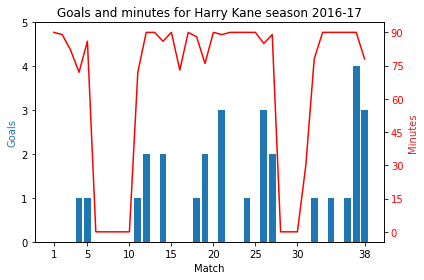

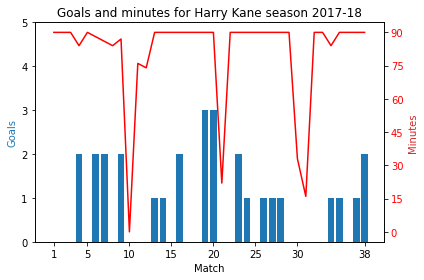

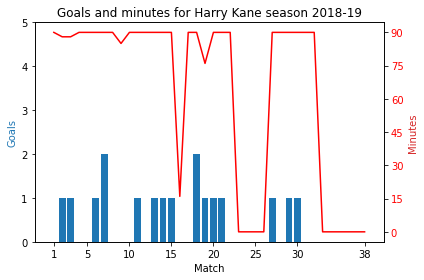

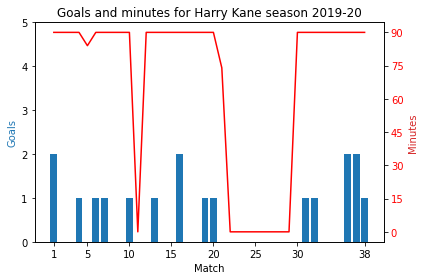

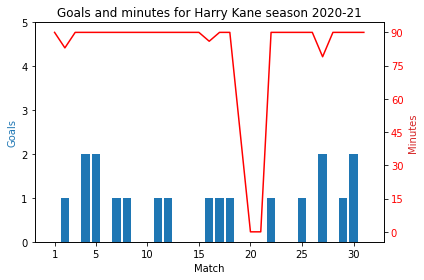

In [11]:
plot_goals_minutes("Harry Kane", kane_dataframes)

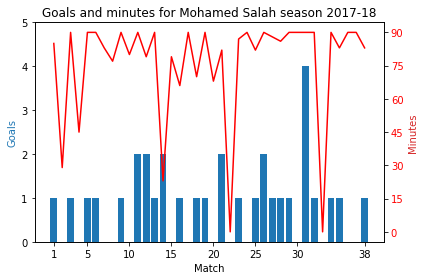

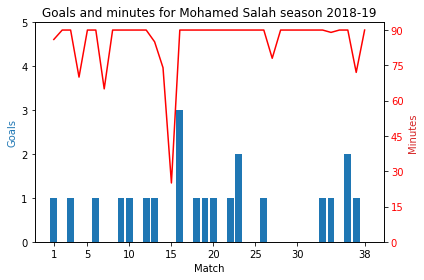

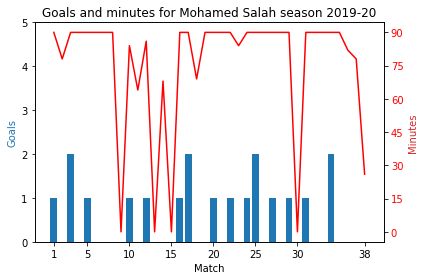

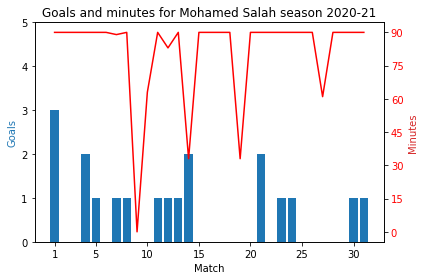

In [12]:
plot_goals_minutes("Mohamed Salah", salah_dataframes)

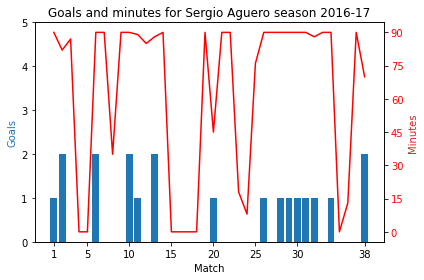

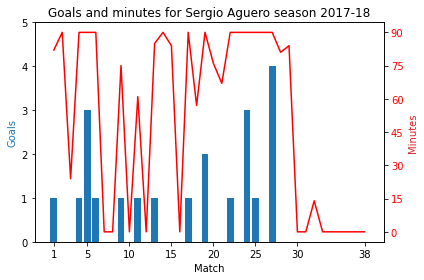

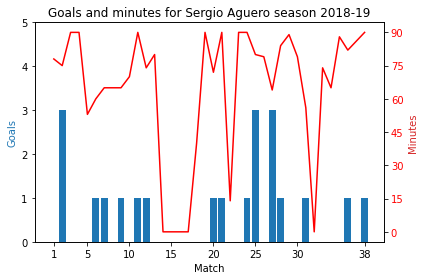

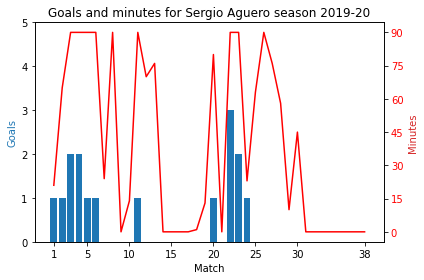

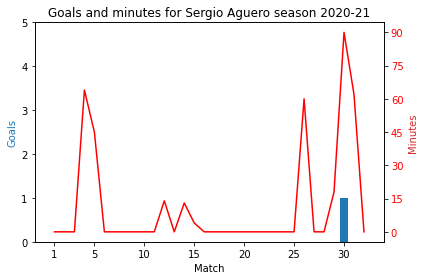

In [13]:
plot_goals_minutes("Sergio Aguero", aguero_dataframes)

In [18]:
def minutes_played_per_match(dataframe, season):
    minutes_intervals = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']
    matches_per_minute = dict()
    
    matches_per_minute['0'] = len(dataframe[dataframe['minutes'] == 0])
    
    for interval in minutes_intervals:
        minutes = interval.split('-')
        minute_start = int(minutes[0])
        minute_end = int(minutes[1])
        matches_per_minute[interval] = len(dataframe[(dataframe['minutes'] > minute_start) & 
                                                     (dataframe['minutes'] <= minute_end) ])
        
    matches_per_minute['90'] = len(dataframe[dataframe['minutes'] == 90])
    return matches_per_minute

In [19]:
def plot_minutes_played(minutes_played_dict, player, season):
    plt.figure()
    plt.yticks([1, 5, 10, 15, 20, 25, 30, 38])
    plt.bar(minutes_played_dict.keys(), minutes_played_dict.values())
    plt.xlabel('Minutes')
    plt.ylabel('Number of matches')
    plt.title("Minutes played by {}  in matches in season {}".format(player, season))

    plt.show()

In [20]:
def safe_division(x,y):
    if y == 0:
        return 0
    else:
        return int(x/y)


def get_player_statisctics_for_season(dataframe, season, player: str):
    print('Statistics for {} in season {}'.format(player, season))
    minutes_played = dataframe.sum()['minutes']
    goals_scored = dataframe.sum()['goals_scored']
    assists = dataframe.sum()['assists']
    matches_count = len(dataframe.index)
    minutes_played_dict = minutes_played_per_match(dataframe, season)
    print('Minutes played: {} '.format(minutes_played))
    print('Average minutes per match: {} '.format(safe_division(minutes_played, matches_count)))
    print('Goals scored: {}'.format(goals_scored))
    print('Assists: {}'.format(assists))
    print('Minutes for goals : {} '.format(safe_division(minutes_played, goals_scored))) #chodzi o co ile minut strzela średnio gola
    print('Minutes for assist : {} '.format(safe_division(minutes_played, assists))) #co ile minut asystuje
    print('Structure of minutes played in match: ' + str(minutes_played_dict))
    plot_minutes_played(minutes_played_dict, player, season)


Statistics for Harry Kane in season 2016-17
Minutes played: 2523 
Average minutes per match: 66 
Goals scored: 29
Assists: 7
Minutes for goals : 87 
Minutes for assist : 360 
Structure of minutes played in match: {'0': 8, '0-15': 0, '15-30': 1, '30-45': 0, '45-60': 0, '60-75': 3, '75-90': 26, '90': 15}


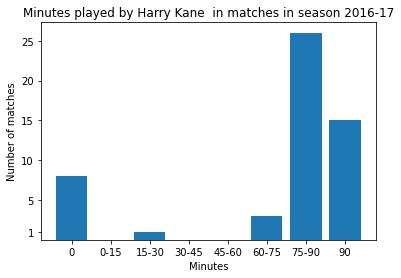

In [21]:
get_player_statisctics_for_season(kane_2016_17, '2016-17', 'Harry Kane')

Statistics for Sergio Aguero in season 2016-17
Minutes played: 2404 
Average minutes per match: 63 
Goals scored: 20
Assists: 5
Minutes for goals : 120 
Minutes for assist : 480 
Structure of minutes played in match: {'0': 7, '0-15': 2, '15-30': 1, '30-45': 2, '45-60': 0, '60-75': 1, '75-90': 25, '90': 18}


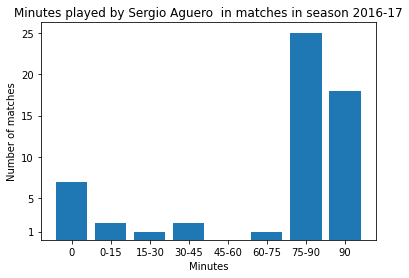

Statistics for Sergio Aguero in season 2017-18
Minutes played: 1960 
Average minutes per match: 51 
Goals scored: 21
Assists: 6
Minutes for goals : 93 
Minutes for assist : 326 
Structure of minutes played in match: {'0': 13, '0-15': 1, '15-30': 1, '30-45': 0, '45-60': 1, '60-75': 3, '75-90': 19, '90': 13}


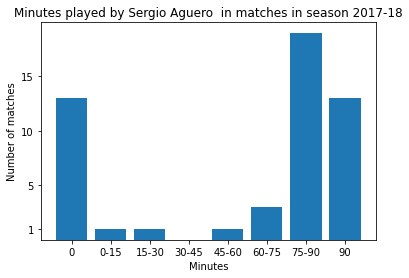

Statistics for Sergio Aguero in season 2018-19
Minutes played: 2457 
Average minutes per match: 64 
Goals scored: 21
Assists: 11
Minutes for goals : 117 
Minutes for assist : 223 
Structure of minutes played in match: {'0': 5, '0-15': 1, '15-30': 0, '30-45': 1, '45-60': 3, '60-75': 10, '75-90': 18, '90': 8}


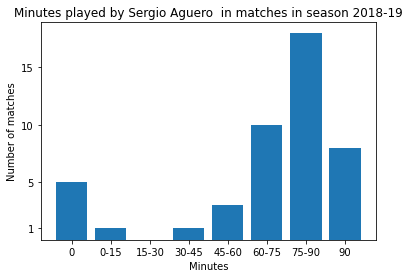

Statistics for Sergio Aguero in season 2019-20
Minutes played: 1449 
Average minutes per match: 38 
Goals scored: 16
Assists: 6
Minutes for goals : 90 
Minutes for assist : 241 
Structure of minutes played in match: {'0': 14, '0-15': 4, '15-30': 3, '30-45': 1, '45-60': 1, '60-75': 3, '75-90': 12, '90': 9}


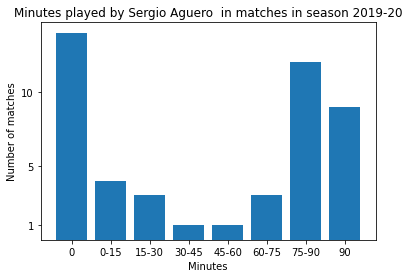

Statistics for Sergio Aguero in season 2020-21
Minutes played: 370 
Average minutes per match: 11 
Goals scored: 1
Assists: 0
Minutes for goals : 370 
Minutes for assist : 0 
Structure of minutes played in match: {'0': 23, '0-15': 3, '15-30': 1, '30-45': 1, '45-60': 1, '60-75': 2, '75-90': 1, '90': 1}


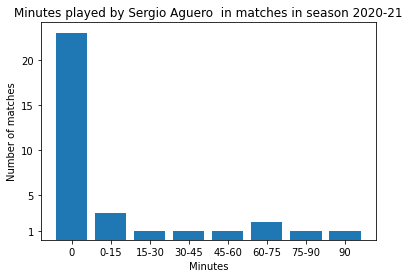

In [22]:
for season in aguero_dataframes:
    df = pd.read_csv(aguero_dataframes[season])
    get_player_statisctics_for_season(df, season, 'Sergio Aguero')

## Trying to concatenate all dataframes for all seasones 

In [23]:
print(seasons)
kane_all = pd.concat(pd.read_csv(dataframe) for dataframe in kane_dataframes.values())
len(kane_all.columns)

['2016-17', '2017-18', '2018-19', '2019-20', '2020-21']


54

In [227]:
type(kane_all)
kane_all.dropna(axis=1)

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,0,0,5,0,15.3,403,3,1,0,1.9,...,1,1,4.0,2,0,0,0,110,False,0
1,1,0,19,1,23.8,403,16,0,0,8.7,...,0,1,41.0,5,-32117,13110,45227,110,True,0
2,0,0,2,0,10.6,403,27,1,0,1.9,...,1,1,6.0,2,-124703,6334,131037,109,True,0
3,0,0,28,1,5.8,403,37,0,1,9.8,...,4,0,50.0,6,8509,81771,73262,109,False,0
4,0,3,38,1,52.8,403,49,0,1,21.8,...,0,1,109.0,9,20666,45347,24681,109,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2,3,80,0,34.2,388,266,1,2,20.1,...,1,4,60.0,19,165278,191720,26442,112,True,0
27,0,0,6,0,5.4,388,269,2,0,2.8,...,1,2,19.0,2,437315,488213,50898,114,False,0
28,0,1,25,1,3.4,388,170,0,1,8.8,...,2,0,43.0,7,425113,443169,18056,115,False,0
29,0,3,50,0,4.9,388,296,2,2,20.9,...,2,2,126.0,13,169312,188988,19676,116,False,0


In [221]:
kane_all.columns


Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards'],
      dtype='object')

In [222]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [224]:
corr = kane_all.corr()
corr.style.background_gradient(cmap='coolwarm')

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
assists,1.000000,0.226956,0.471940,-0.093783,0.323450,0.444378,0.185311,-0.085958,0.223578,0.327098,0.166930,nan,0.102525,nan,nan,-0.155991,-0.044176,-0.081078,0.207423,0.330397,0.013742,0.428531,0.220422,nan,nan,0.156028,-0.002056,0.186915,-0.017475,nan,nan,-0.037289,nan,0.066688,nan,-0.152724,nan,0.040062,0.238150,0.163939,0.152033,0.203513,0.135150,0.137934,0.493399,0.043265,0.074373,0.003589,-0.133062,0.025588,0.117254,0.001953
attempted_passes,0.226956,1.000000,0.146607,0.161281,0.364408,0.422763,0.274317,0.229983,0.956017,0.574669,0.464766,nan,0.072550,nan,nan,-0.202353,0.300098,0.256940,0.358899,0.585171,-0.182292,0.434157,0.465947,nan,nan,0.815871,0.214884,0.173910,-0.023751,nan,nan,-0.091424,nan,0.508276,nan,-0.194773,nan,0.295053,0.395237,0.159326,0.503464,0.063471,0.073076,0.531718,0.472430,0.317339,0.185844,-0.289243,0.078018,-0.008600,0.234996,0.185935
big_chances_created,0.471940,0.146607,1.000000,-0.128799,0.241273,0.339339,0.255155,-0.056551,0.162894,0.360753,0.090660,nan,0.000000,nan,nan,0.014023,0.080540,-0.131238,0.216514,0.314613,0.009425,0.304970,0.341715,nan,nan,0.163554,0.050815,0.147383,0.042759,nan,nan,-0.057864,nan,0.017235,nan,0.006814,nan,0.120148,0.167658,0.037994,-0.008707,0.047300,0.172132,0.208424,0.321107,0.079008,0.057507,-0.062384,0.026204,0.096225,0.189445,-0.079667
big_chances_missed,-0.093783,0.161281,-0.128799,1.000000,0.084959,0.108386,0.157746,0.034962,0.173983,0.150986,0.207126,nan,0.029696,nan,nan,-0.001219,0.078487,-0.026775,0.202513,0.345873,-0.004527,0.200382,0.114195,nan,nan,0.291344,0.110348,0.072648,0.069855,nan,nan,0.262339,nan,0.205000,nan,-0.010216,nan,0.168967,0.031650,0.026099,0.408079,-0.065934,0.102554,0.425223,0.160772,0.063737,0.004324,-0.086373,0.091335,0.074362,0.284164,0.025858
bonus,0.323450,0.364408,0.241273,0.084959,1.000000,0.871453,0.117461,-0.119595,0.391786,0.368941,0.389126,nan,0.074643,nan,nan,-0.062995,-0.069973,0.054979,0.836545,0.743512,-0.051995,0.859174,0.309596,nan,nan,0.312507,0.129341,0.136389,0.072400,nan,nan,-0.069732,nan,0.208507,nan,-0.047091,nan,0.093952,0.139068,0.076311,0.300195,0.317296,0.267211,0.532502,0.898804,0.055559,0.010276,-0.070297,-0.051666,-0.018636,0.454121,-0.114454
bps,0.444378,0.422763,0.339339,0.108386,0.871453,1.000000,0.220966,-0.066178,0.433918,0.399625,0.409745,nan,0.137433,nan,nan,-0.024143,-0.027895,0.056768,0.948492,0.821653,0.048827,0.979604,0.289359,nan,nan,0.381963,0.135694,0.196487,0.023355,nan,nan,-0.007205,nan,0.308316,nan,-0.007259,nan,0.074928,0.173776,0.131038,0.352364,0.397353,0.349432,0.564438,0.979655,0.106747,0.044087,-0.113669,-0.030763,0.019959,0.570155,-0.110325
clean_sheets,0.185311,0.274317,0.255155,0.157746,0.117461,0.220966,1.000000,0.094446,0.320599,0.300022,0.061261,nan,0.186063,nan,nan,-0.040513,0.053500,-0.551774,0.157219,0.313963,-0.103363,0.235848,0.344991,nan,nan,0.297871,0.112024,0.039029,-0.145124,nan,nan,-0.068011,nan,0.330396,nan,-0.015619,nan,0.134439,0.297819,0.289538,0.095970,-0.282456,-0.046642,0.285593,0.217920,0.205602,0.201779,-0.116227,0.068715,0.171278,0.319505,0.067934
clearances_blocks_interceptions,-0.085958,0.229983,-0.056551,0.034962,-0.119595,-0.066178,0.094446,1.000000,0.202082,-0.012873,-0.059787,nan,0.081376,nan,nan,-0.142335,0.122785,0.180224,-0.071870,0.002595,-0.141571,-0.002676,-0.074353,nan,nan,0.308453,0.042791,-0.025065,-0.000492,nan,nan

## Use PCA

In [275]:
all_players = pd.read_csv("data/2020-21/cleaned_players.csv", header=0)
player_names = all_players.iloc[:, [0, 1, -1]]
player_data = all_players.iloc[:, 2:-1]
print(player_names)
print(player_data)
print(player_data.columns)


         first_name           second_name element_type
0             Mesut                  Özil          MID
1          Sokratis      Papastathopoulos          DEF
2             David  Luiz Moreira Marinho          DEF
3    Pierre-Emerick            Aubameyang          MID
4            Cédric                Soares          DEF
..              ...                   ...          ...
686         Andreas           Söndergaard           GK
687         Patrick               Cutrone          FWD
688           Nigel               Lonwijk          DEF
689    Willian José              Da Silva          FWD
690            Hugo                 Bueno          DEF

[691 rows x 3 columns]
     goals_scored  assists  total_points  minutes  goals_conceded  creativity  \
0               0        0             0        0               0         0.0   
1               0        0             0        0               0         0.0   
2               1        0            40     1344              20        

In [268]:
from sklearn import preprocessing

x = player_data.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [270]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.293348,1.380779
1,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.363670,-0.215720
2,-0.059154,-0.525829,0.066468,0.507614,0.493396,-0.415373,0.254186,-0.072224,-0.604829,0.345609,-0.074565,-0.009026,4.265495,-0.172637,-0.240606,0.288437
3,3.115623,-0.032820,1.693992,1.240364,0.854328,0.897980,1.093847,2.546291,1.476529,0.810777,1.770484,1.075705,-0.234439,0.384803,1.060352,5.245987
4,-0.456001,-0.032820,-0.220742,-0.155509,-0.156282,-0.045594,-0.357723,-0.317710,0.019579,-0.203625,-0.284109,-0.280209,-0.234439,-0.172637,-0.310928,-0.383773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.328509,-0.887930
687,-0.456001,-0.525829,-0.843030,-0.952362,-0.950333,-0.655517,-0.864446,-0.584730,-0.604829,-0.876157,-0.799089,-0.822575,-0.234439,-0.730078,-0.381250,0.708569
688,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.381250,-0.887930
689,-0.456001,-0.032820,-0.316478,-0.084776,-0.372841,0.073946,-0.661391,0.164648,-0.604829,-0.467033,-0.166907,0.262156,-0.234439,-0.730078,-0.346089,1.464805


In [271]:
array = df.values

In [272]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [284]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
attributes = player_data.columns
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))


Attribute, PC1, PC2
goals_scored:0.2359137882730251:0.3574707313832763
assists:0.24304448318434757:0.24979129964789593
total_points:0.30360125489977946:-0.05322324820794574
minutes:0.27857844691950856:-0.2923950016024387
goals_conceded:0.2469693539171682:-0.3398328896093121
creativity:0.2534095283745458:0.08740219053573067
influence:0.29208959130871875:-0.16378604755236542
threat:0.2526292411737174:0.2958519309145024
bonus:0.27111007206093135:0.10630217627965469
bps:0.2864975080019671:-0.2206517471508535
ict_index:0.3023092239924421:0.08689872925637931
clean_sheets:0.2694279741962444:-0.18747401603039984
red_cards:0.04852547047274526:-0.23227648613658852
yellow_cards:0.1743539631354598:-0.3820331184287305
selected_by_percent:0.21388439091210365:0.23459642876127557
now_cost:0.2075618584018563:0.35551267984695173


In [291]:
y = all_players.loc[:, 'element_type']

gk = y == 'GK'
defen = y == 'DEF'
mid = y == 'MID'
fwd = y == 'FWD'

X_pca[np.array(gk), 1]
X_pca[np.array(defen), 1]

array([ 6.59153967e-01, -1.59549565e+00, -1.14382790e-01,  6.45875007e-01,
       -6.69155080e-01, -1.78825377e+00,  3.27893830e-01,  5.98774953e-01,
       -1.86851603e+00, -1.18712594e+00,  4.36672044e-01, -1.69525632e+00,
       -4.06453883e-01,  2.17244848e-01,  5.39664354e-01,  1.12706301e-01,
       -3.05633365e+00, -2.83696944e+00,  5.65412431e-01, -2.20768455e+00,
        5.09791950e-01, -2.66504015e+00,  5.05667624e-01, -1.91678790e+00,
       -2.79498387e+00,  5.65412431e-01, -2.09671282e+00, -1.62429587e+00,
        5.35540028e-01, -2.85937911e+00,  4.78431514e-01, -9.83463318e-01,
        5.65412431e-01, -2.54263618e+00, -2.10550857e-01, -5.32104801e-01,
       -6.10047390e-01, -1.54623757e+00, -2.52715047e+00,  3.90302337e-01,
       -1.43414088e+00,  4.69334852e-01,  4.02675315e-01,  3.90302337e-01,
        4.16050414e-01, -1.11127289e+00,  3.72885271e-01, -3.88683591e-01,
       -2.31508616e-01,  5.08665042e-01, -1.85814494e+00,  5.44196513e-01,
       -4.22694908e-01, -

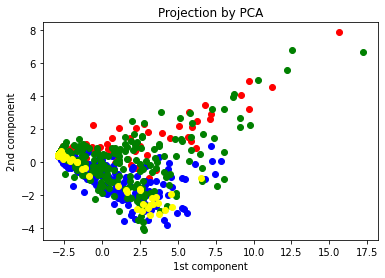

In [295]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(fwd), 0], X_pca[np.array(fwd), 1], c="red")
plt.scatter(X_pca[np.array(defen), 0], X_pca[np.array(defen), 1], c="blue")
plt.scatter(X_pca[np.array(mid), 0], X_pca[np.array(mid), 1], c="green")
plt.scatter(X_pca[np.array(gk), 0], X_pca[np.array(gk), 1], c="yellow")

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

In [303]:
player_names['first_name'][0]

'Mesut'

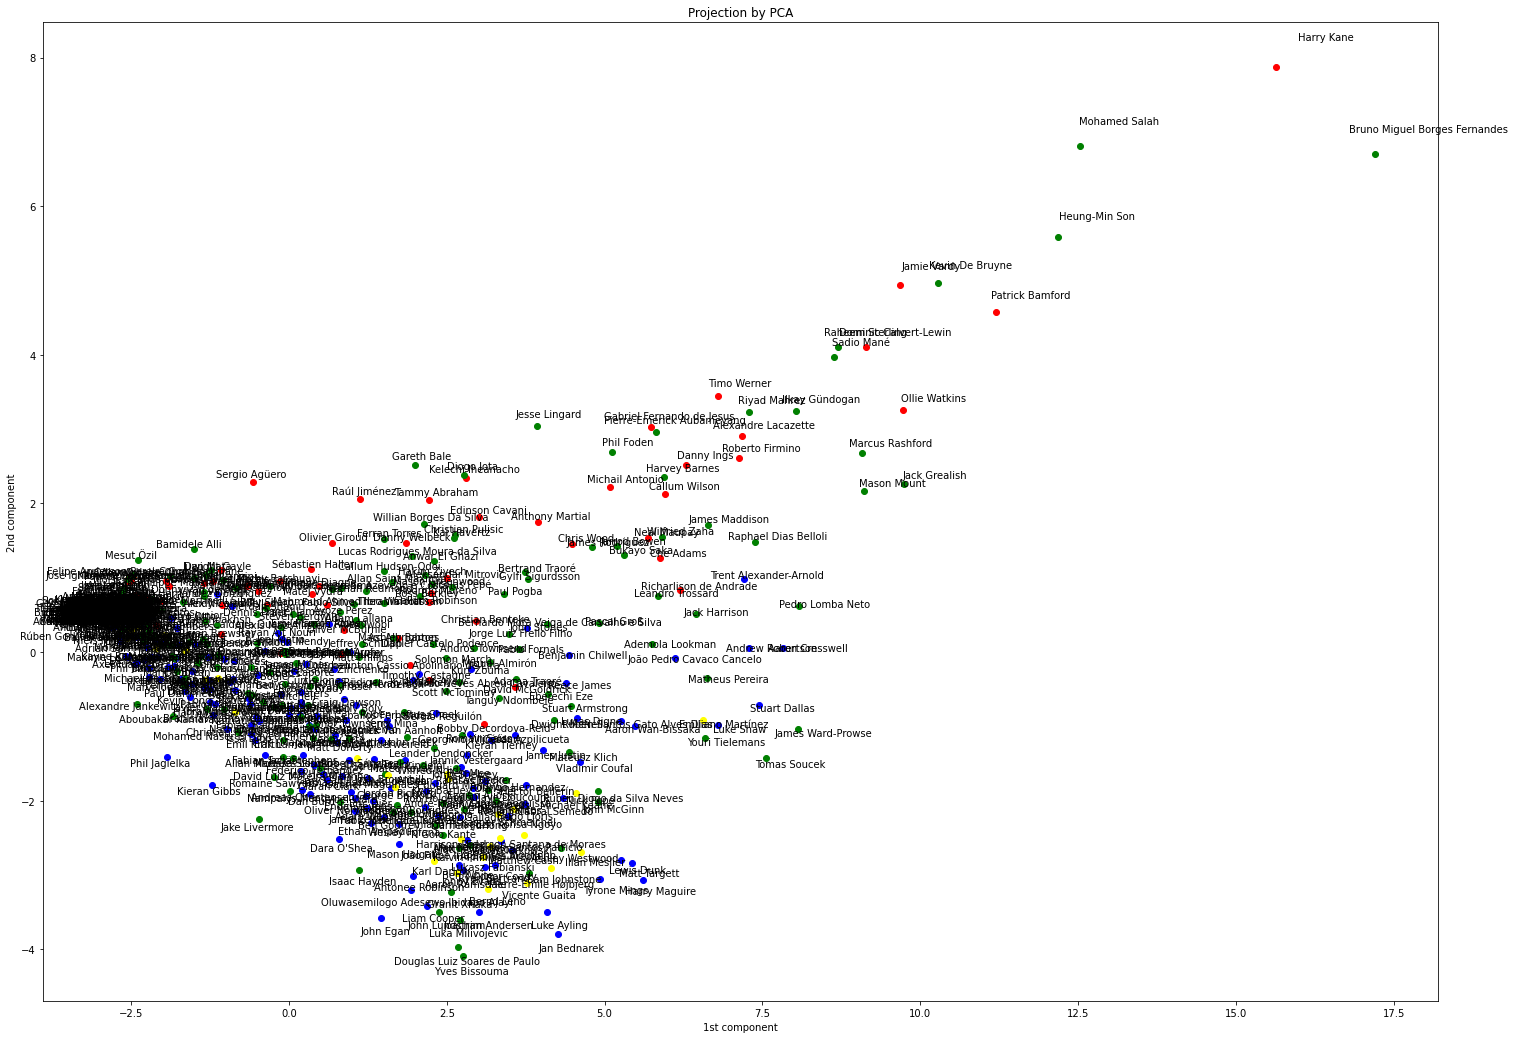

In [311]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,18))

for i in range(0, 690):
  plt.text(X_pca[i, 0] * 1.05, X_pca[i, 1]*1.05, player_names['first_name'][i] + ' '+ player_names['second_name'][i], c="black", ha="center", va="center")

plt.scatter(X_pca[np.array(fwd), 0], X_pca[np.array(fwd), 1], c="red")
plt.scatter(X_pca[np.array(defen), 0], X_pca[np.array(defen), 1], c="blue")
plt.scatter(X_pca[np.array(mid), 0], X_pca[np.array(mid), 1], c="green")
plt.scatter(X_pca[np.array(gk), 0], X_pca[np.array(gk), 1], c="yellow")

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

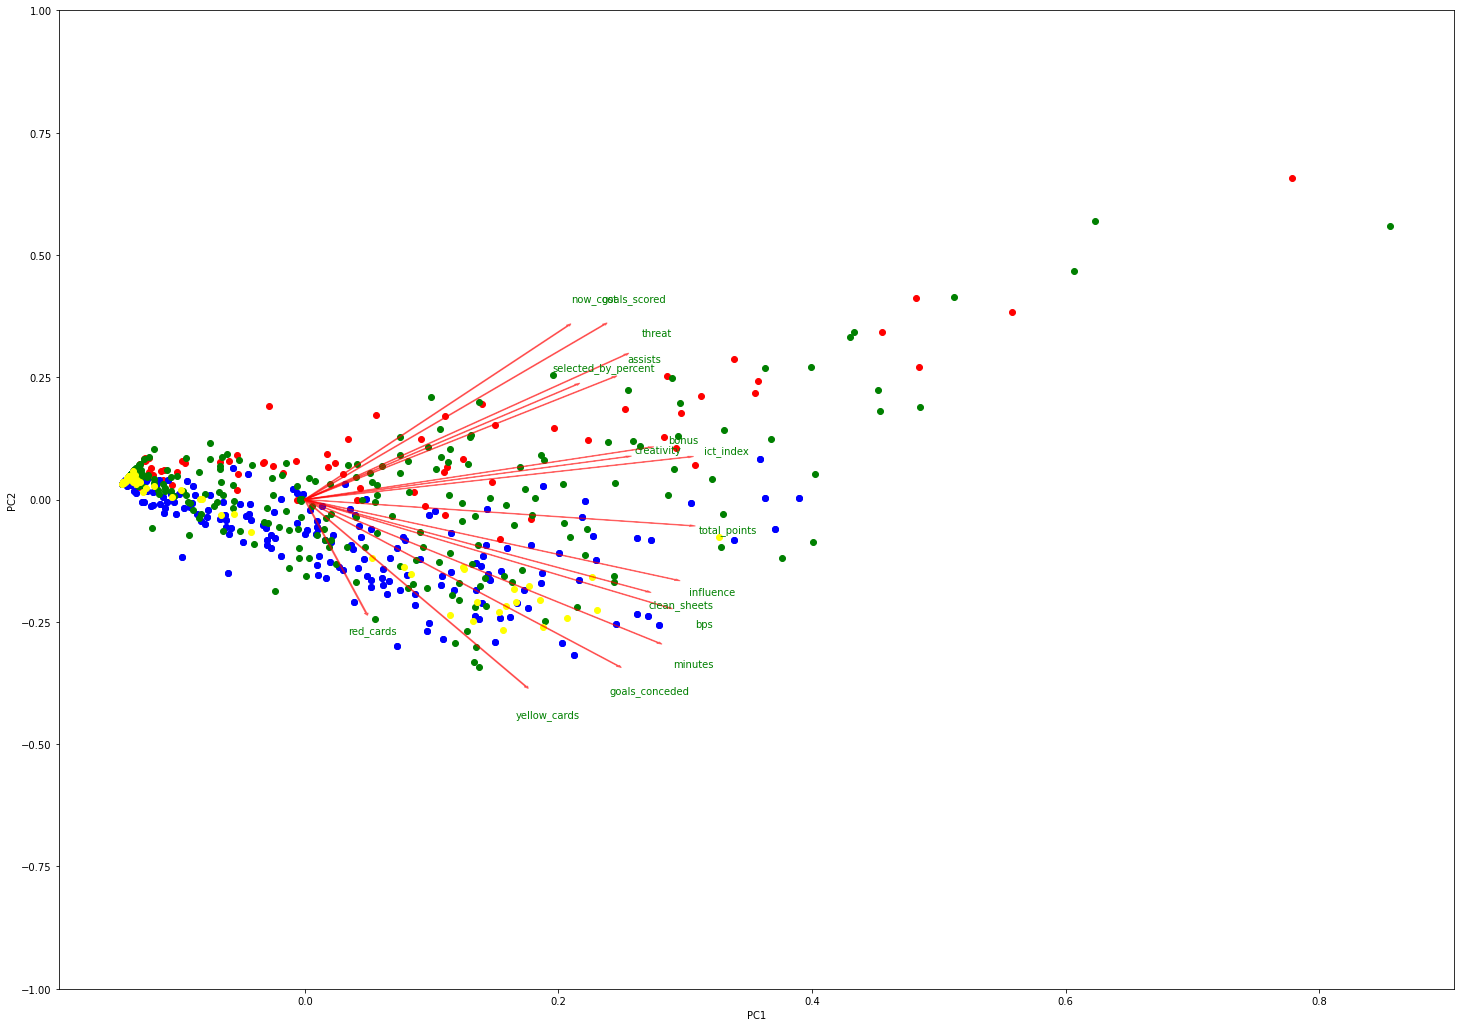

In [320]:
def biplot(score, coeffs, labels=None):
    plt.figure(figsize=(25,18))
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    xs = score[:,0]
    ys = score[:,1]
    n = coeffs.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
#     plt.scatter(xs * scalex, ys * scaley)
    plt.scatter(X_pca[np.array(fwd), 0] *scalex, X_pca[np.array(fwd), 1] * scaley, c="red")
    plt.scatter(X_pca[np.array(defen), 0] * scalex, X_pca[np.array(defen),1] * scaley, c="blue")
    plt.scatter(X_pca[np.array(defen), 0] * scalex, X_pca[np.array(defen),1] * scaley, c="blue")

    plt.scatter(X_pca[np.array(mid), 0] * scalex, X_pca[np.array(mid), 1] * scaley, c="green")
    plt.scatter(X_pca[np.array(gk), 0] * scalex, X_pca[np.array(gk), 1] * scaley, c="yellow")

    for i in range(n):
        plt.arrow(0, 0, coeffs[i,0], coeffs[i,1], color='r', alpha = 0.5)
        plt.text(coeffs[i,0] * 1.1, coeffs[i,1] * 1.15, labels[i], color="g", ha="center", va="center")

            
biplot(X_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), attributes)
axes = plt.gca()
axes.set_ylim([-1.0, 1.0])
plt.show()

# Transfermarkt analysis


In [ ]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('Database/fpa-database-fix.db')

df_players = pd.read_sql_query("SELECT * FROM players_transfermarkt", cnx)
if (cnx): cnx.close()
print(df_players)

In [ ]:
# Lista pozycji
df_players.player_position.unique()

In [ ]:
cnx = sqlite3.connect('Database/fpa-database-fix.db')

df_players_best_players_for_position = pd.read_sql_query("SELECT max(current_value), current_club_id, player_position FROM players_transfermarkt group by current_club_id, player_position", cnx)
# if (cnx): cnx.close()

print(df_players_best_players_for_position)

In [ ]:
df_players_best_players_for_position = df_players_best_players_for_position.drop(['current_club_id'], axis=1)

df_players_best_players_for_position = df_players_best_players_for_position.groupby(['player_position']).max()

print(df_players_best_players_for_position.groupby(['player_position']).max())



In [ ]:
df_players_best_players_for_position = pd.read_sql_query("SELECT max(current_value), current_club_id, player_position FROM players_transfermarkt group by current_club_id, player_position", cnx)
# players = pd.read(sql_query)

In [ ]:
players_with_values = pd.read_sql_query("SELECT * from players as p " + \
                                        "JOIN players_transfermarkt_fpl as ptf on ptf.player_id_fpl = p.guid " + \
                                        "JOIN players_transfermarkt as pt on pt.id = ptf.player_id_transfermarkt " +
                                        "JOIN player_statistics as ps on ps.guid = p.guid " +
                                        "JOIN player_values as pv on pv.transfermarkt_player_id = pt.id " +
                                        "WHERE strftime('%Y',pv.date_stamp) = ps.year", cnx)

In [ ]:
players_with_values

In [ ]:
forwards = players_with_values[players_with_values['player_position'] == 'Centre-Forward']

In [ ]:
goalkeepers = players_with_values[players_with_values['player_position'] == 'Centre-Forward']

In [ ]:
attackers = players_with_values[(players_with_values['player_position'] ==  'Centre-Forward') |
                                (players_with_values['player_position'] ==  'Second Striker') |
                               (players_with_values['player_position'] ==  'Left Winger') |
                               (players_with_values['player_position'] ==  'Right Winger')
                               ]

In [ ]:
forwards

In [ ]:
attackers

In [ ]:
import numpy as np

In [ ]:
def calculate_correlation(arr1, arr2):
    return np.corrcoef(arr1, arr2)[0][1]

In [ ]:

print(calculate_correlation(forwards['player_value'], forwards['goals_scored'] ))
print(calculate_correlation(forwards['goals_scored'], forwards['minutes'] ))
print(calculate_correlation(forwards['player_value'], forwards['minutes'] ))
print(calculate_correlation(forwards['player_value'], forwards['creativity'] ))
print(calculate_correlation(forwards['player_value'], forwards['threat'] ))
print(calculate_correlation(forwards['player_value'], forwards['ict_index'] ))



print(calculate_correlation(forwards['player_value'], forwards['selected_by_percent'] ))
print(calculate_correlation(forwards['goals_scored'], forwards['selected_by_percent'] ))


print(calculate_correlation(forwards['player_value'], forwards['selected_by_percent'] ))

In [ ]:
print(calculate_correlation(attackers['player_value'], attackers['goals_scored'] ))
print(calculate_correlation(attackers['goals_scored'], attackers['minutes'] ))
print(calculate_correlation(attackers['player_value'], attackers['minutes'] ))
print(calculate_correlation(attackers['player_value'], attackers['creativity'] ))
print(calculate_correlation(attackers['player_value'], attackers['threat'] ))
print(calculate_correlation(attackers['player_value'], attackers['ict_index'] ))

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = forwards.corr()
corr['player_value']

# Transfermarkt analysis


In [1]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('Database/fpa-database-fix.db')

df_players = pd.read_sql_query("SELECT * FROM players_transfermarkt", cnx)
if (cnx): cnx.close()
print(df_players)

      id      player_name        date_of_birth player_position    nationality  \
0      1          Ederson  1993-08-17 00:00:00      Goalkeeper         Brazil   
1      2     Zack Steffen  1995-04-02 00:00:00      Goalkeeper  United States   
2      3     Scott Carson  1985-09-03 00:00:00      Goalkeeper        England   
3      4       Rúben Dias  1997-05-14 00:00:00     Centre-Back       Portugal   
4      5  Aymeric Laporte  1994-05-27 00:00:00     Centre-Back         France   
..   ...              ...                  ...             ...            ...   
511  512     Karlan Grant  1997-09-18 00:00:00  Centre-Forward        England   
512  513  Callum Robinson  1995-02-02 00:00:00  Centre-Forward        Ireland   
513  514     Mbaye Diagne  1991-10-28 00:00:00  Centre-Forward        Senegal   
514  515   Kenneth Zohore  1994-01-31 00:00:00  Centre-Forward        Denmark   
515  516  Hal Robson-Kanu  1989-05-21 00:00:00  Centre-Forward          Wales   

     current_value         

In [2]:
# Lista pozycji
df_players.player_position.unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Centre-Forward', 'Right Midfield',
       'Left Midfield', 'Second Striker'], dtype=object)

In [11]:
cnx = sqlite3.connect('Database/fpa-database-fix.db')

df_players_best_players_for_position = pd.read_sql_query("SELECT max(current_value), current_club_id, player_position FROM players_transfermarkt group by current_club_id, player_position", cnx)
# if (cnx): cnx.close()

print(df_players_best_players_for_position)

     max(current_value) current_club_id     player_position
0                 100.0               1  Attacking Midfield
1                  70.0               1    Central Midfield
2                  70.0               1         Centre-Back
3                  60.0               1      Centre-Forward
4                  70.0               1  Defensive Midfield
..                  ...             ...                 ...
196                10.0               9          Goalkeeper
197                35.0               9         Left Winger
198                20.0               9           Left-Back
199                35.0               9        Right Winger
200                32.0               9          Right-Back

[201 rows x 3 columns]


In [12]:
df_players_best_players_for_position = df_players_best_players_for_position.drop(['current_club_id'], axis=1)

df_players_best_players_for_position = df_players_best_players_for_position.groupby(['player_position']).max()

print(df_players_best_players_for_position.groupby(['player_position']).max())



                    max(current_value)
player_position                       
Attacking Midfield               100.0
Central Midfield                  70.0
Centre-Back                       70.0
Centre-Forward                   120.0
Defensive Midfield                70.0
Goalkeeper                        65.0
Left Midfield                     35.0
Left Winger                      100.0
Left-Back                         70.0
Right Midfield                    18.0
Right Winger                     110.0
Right-Back                       100.0
Second Striker                    18.0


In [16]:
df_players_best_players_for_position = pd.read_sql_query("SELECT max(current_value), current_club_id, player_position FROM players_transfermarkt group by current_club_id, player_position", cnx)
# players = pd.read(sql_query)

In [19]:
players_with_values = pd.read_sql_query("SELECT * from players as p " + \
                                        "JOIN players_transfermarkt_fpl as ptf on ptf.player_id_fpl = p.guid " + \
                                        "JOIN players_transfermarkt as pt on pt.id = ptf.player_id_transfermarkt " +
                                        "JOIN player_statistics as ps on ps.guid = p.guid " +
                                        "JOIN player_values as pv on pv.transfermarkt_player_id = pt.id " +
                                        "WHERE strftime('%Y',pv.date_stamp) = ps.year", cnx)

In [23]:
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,now_cost,element_type,id,transfermarkt_player_id,date_stamp,player_value,player_club
0,Paul,Pogba,502,75,94,502,94,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,7,7.3,2016,NaN,None,5,94,2016-04-01 00:00:00,65000000,Juventus FC
1,Wilfred,Ndidi,627,138,173,627,173,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,0,0.7,2016,NaN,None,19,173,2016-04-14 00:00:00,2000000,KRC Genk
2,Nathaniel,Phillips,1179,23,33,1179,33,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,2,2.9,2020,41.0,DEF,32,33,2020-04-02 00:00:00,1000000,VfB Stuttgart
3,Andrew,Robertson,151,25,35,151,35,Andrew Robertson,1994-03-11 00:00:00,Left-Back,...,5,1.9,2016,NaN,None,38,35,2016-04-20 00:00:00,6000000,Hull City
4,Lee,Grant,573,65,83,573,83,Lee Grant,1983-01-27 00:00:00,Goalkeeper,...,1,6.5,2016,NaN,None,39,83,2016-04-20 00:00:00,500000,Derby County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,Kevin,De Bruyne,234,13,18,234,18,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,...,3,48.9,2019,106.0,None,9665,18,2019-12-10 00:00:00,150000000,Manchester City
3514,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,33.9,2018,132.0,None,9666,50,2018-05-28 00:00:00,150000000,Liverpool FC
3515,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,33.9,2018,132.0,None,9667,50,2018-12-19 00:00:00,150000000,Liverpool FC
3516,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,32.4,2019,125.0,None,9668,50,2019-06-13 00:00:00,150000000,Liverpool FC


In [31]:
forwards = players_with_values[players_with_values['player_position'] == 'Centre-Forward']

In [ ]:
goalkeepers = players_with_values[players_with_values['player_position'] == 'Centre-Forward']

In [48]:
attackers = players_with_values[(players_with_values['player_position'] ==  'Centre-Forward') |
                                (players_with_values['player_position'] ==  'Second Striker') |
                               (players_with_values['player_position'] ==  'Left Winger') |
                               (players_with_values['player_position'] ==  'Right Winger')
                               ]

In [36]:
forwards

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,now_cost,element_type,id,transfermarkt_player_id,date_stamp,player_value,player_club
18,Matej,Vydra,482,420,489,482,489,Matej Vydra,1992-05-01 00:00:00,Centre-Forward,...,0,0.3,2016,NaN,None,86,489,2016-04-20 00:00:00,5500000,Reading FC
23,Hal,Robson-Kanu,570,446,516,570,516,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,...,3,0.3,2016,NaN,None,95,516,2016-04-20 00:00:00,2000000,Reading FC
28,Divock,Origi,216,41,53,216,53,Divock Origi,1995-04-18 00:00:00,Centre-Forward,...,0,0.3,2018,50.0,None,135,53,2018-04-04 00:00:00,10000000,VfL Wolfsburg
31,Michy,Batshuayi,95,368,437,95,437,Michy Batshuayi,1993-10-02 00:00:00,Centre-Forward,...,0,0.8,2018,62.0,None,141,437,2018-04-04 00:00:00,40000000,Borussia Dortmund
46,Sergio,Aguero,238,17,24,238,24,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,...,0,1.4,2020,103.0,FWD,191,24,2020-04-08 00:00:00,52000000,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,Connor,Wickham,121,371,440,121,440,Connor Wickham,1993-03-31 00:00:00,Centre-Forward,...,0,0.0,2017,54.0,None,9497,440,2017-02-20 00:00:00,6000000,Crystal Palace
3438,Connor,Wickham,121,371,440,121,440,Connor Wickham,1993-03-31 00:00:00,Centre-Forward,...,0,0.0,2017,54.0,None,9498,440,2017-06-28 00:00:00,6000000,Crystal Palace
3447,Oliver,Burke,882,395,464,882,464,Oliver Burke,1997-04-07 00:00:00,Centre-Forward,...,0,0.0,2017,49.0,None,9515,464,2017-06-19 00:00:00,7000000,RB Leipzig
3459,Oliver,Burke,882,395,464,882,464,Oliver Burke,1997-04-07 00:00:00,Centre-Forward,...,0,0.0,2017,49.0,None,9548,464,2017-02-07 00:00:00,10000000,RB Leipzig


In [49]:
attackers

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,now_cost,element_type,id,transfermarkt_player_id,date_stamp,player_value,player_club
10,Ryan,Fraser,535,245,301,535,301,Ryan Fraser,1994-02-24 00:00:00,Left Winger,...,3,1.2,2016,NaN,None,53,301,2016-04-20 00:00:00,500000,Ipswich Town
11,Ademola,Lookman,626,319,382,626,382,Ademola Lookman,1997-10-20 00:00:00,Left Winger,...,0,0.0,2016,NaN,None,64,382,2016-04-20 00:00:00,500000,Charlton Athletic
17,Johann Berg,Gudmundsson,472,416,485,472,485,Jóhann Berg Gudmundsson,1990-10-27 00:00:00,Right Winger,...,1,0.1,2016,NaN,None,84,485,2016-04-20 00:00:00,2000000,Charlton Athletic
18,Matej,Vydra,482,420,489,482,489,Matej Vydra,1992-05-01 00:00:00,Centre-Forward,...,0,0.3,2016,NaN,None,86,489,2016-04-20 00:00:00,5500000,Reading FC
21,Matt,Phillips,445,440,510,445,510,Matt Phillips,1991-03-13 00:00:00,Right Winger,...,2,4.0,2016,NaN,None,91,510,2016-04-20 00:00:00,6000000,Queens Park Rangers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,0,31.5,2020,125.0,MID,9661,50,2020-10-13 00:00:00,120000000,Liverpool FC
3514,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,33.9,2018,132.0,None,9666,50,2018-05-28 00:00:00,150000000,Liverpool FC
3515,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,33.9,2018,132.0,None,9667,50,2018-12-19 00:00:00,150000000,Liverpool FC
3516,Mohamed,Salah,802,38,50,802,50,Mohamed Salah,1992-06-15 00:00:00,Right Winger,...,1,32.4,2019,125.0,None,9668,50,2019-06-13 00:00:00,150000000,Liverpool FC


In [32]:
import numpy as np

In [33]:
def calculate_correlation(arr1, arr2):
    return np.corrcoef(arr1, arr2)[0][1]

In [62]:

print(calculate_correlation(forwards['player_value'], forwards['goals_scored'] ))
print(calculate_correlation(forwards['goals_scored'], forwards['minutes'] ))
print(calculate_correlation(forwards['player_value'], forwards['minutes'] ))
print(calculate_correlation(forwards['player_value'], forwards['creativity'] ))
print(calculate_correlation(forwards['player_value'], forwards['threat'] ))
print(calculate_correlation(forwards['player_value'], forwards['ict_index'] ))



print(calculate_correlation(forwards['player_value'], forwards['selected_by_percent'] ))
print(calculate_correlation(forwards['goals_scored'], forwards['selected_by_percent'] ))


print(calculate_correlation(forwards['player_value'], forwards['selected_by_percent'] ))

0.5780375471628957
0.8124513262244072
0.43655987386561595
0.5264402483635313
0.5392616831515379
0.5724059526974522
0.46666833312961103
0.7778008266086033


In [60]:
print(calculate_correlation(attackers['player_value'], attackers['goals_scored'] ))
print(calculate_correlation(attackers['goals_scored'], attackers['minutes'] ))
print(calculate_correlation(attackers['player_value'], attackers['minutes'] ))
print(calculate_correlation(attackers['player_value'], attackers['creativity'] ))
print(calculate_correlation(attackers['player_value'], attackers['threat'] ))
print(calculate_correlation(attackers['player_value'], attackers['ict_index'] ))

0.5625143646090849
0.7113828649243936
0.3966258513365902
0.3927608561381046
0.5827741726608238
0.5678155190108727


In [68]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = forwards.corr()
corr['player_value']

guid                      -0.130507
id                        -0.567392
player_id_transfermarkt   -0.572723
player_id_fpl             -0.130507
id                        -0.572723
current_value              0.772768
guid                      -0.130507
goals_scored               0.578038
assists                    0.482821
total_points               0.562695
minutes                    0.436560
goals_conceded             0.234347
creativity                 0.526440
influence                  0.600659
threat                     0.539262
bonus                      0.542437
bps                        0.600707
ict_index                  0.572406
clean_sheets               0.490002
red_cards                  0.016209
yellow_cards               0.147746
selected_by_percent        0.466668
year                      -0.005822
now_cost                   0.829487
id                        -0.053003
player_value               1.000000
Name: player_value, dtype: float64